# Air Quality Prediction

In [35]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the datasets

df1 = pd.read_csv("Air_data.csv")

In [4]:
df1.shape

(29531, 16)

# Data Preprocessing

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df1.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
df1.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [8]:
df1.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
# Creating the Data Dictionary with first column being datatype.

Data_dict = pd.DataFrame(df1.dtypes)
Data_dict

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [10]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = df1.isnull().sum()
Data_dict

,0,MissingVal
City,object,0
Date,object,0
PM2.5,float64,4598
PM10,float64,11140
NO,float64,3582
NO2,float64,3585
NOx,float64,4185
NH3,float64,10328
CO,float64,2059
SO2,float64,3854


In [11]:
# Identifying unique values 

Data_dict['UniqueVal'] = df1.nunique()
Data_dict

,0,MissingVal,UniqueVal
City,object,0,26
Date,object,0,2009
PM2.5,float64,4598,11716
PM10,float64,11140,12571
NO,float64,3582,5776
NO2,float64,3585,7404
NOx,float64,4185,8156
NH3,float64,10328,5922
CO,float64,2059,1779
SO2,float64,3854,4761


In [12]:
# identifying count of the variable.

Data_dict['Count'] = df1.count()
Data_dict

,0,MissingVal,UniqueVal,Count
City,object,0,26,29531
Date,object,0,2009,29531
PM2.5,float64,4598,11716,24933
PM10,float64,11140,12571,18391
NO,float64,3582,5776,25949
NO2,float64,3585,7404,25946
NOx,float64,4185,8156,25346
NH3,float64,10328,5922,19203
CO,float64,2059,1779,27472
SO2,float64,3854,4761,25677


In [13]:
df1.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [14]:
# Calculate Z-scores for each column

z_scores = (df1 - df1.mean()) / df1.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Find total number of outliers for each column 
col_outliers = outliers.sum(axis=0)

print("Outliers per column:")
for col in df1.columns:
    print(f"{col}: {col_outliers[col]}")

Outliers per column:
City: 0
Date: 0
PM2.5: 497
PM10: 358
NO: 595
NO2: 469
NOx: 562
NH3: 355
CO: 546
SO2: 581
O3: 346
Benzene: 97
Toluene: 242
Xylene: 186
AQI: 321
AQI_Bucket: 0


In [53]:
# Calculate Z-scores for each column
z_scores = (df1 - df1.mean()) / df1.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Replace outliers with NaN
df1[outliers] = np.nan

# Replace NaN with median value of each column
median_vals = df1.median()
df1 = df1.fillna(median_vals)

# Find total number of replaced outliers for each column 
col_replaced = outliers.sum(axis=0)

print("Replaced outliers per column:")
for col in df1.columns:
    print(f"{col}: {col_replaced[col]}")


Replaced outliers per column:
City: 0
Date: 0
PM2.5: 118
PM10: 67
NO: 294
NO2: 51
NOx: 115
NH3: 262
CO: 54
SO2: 177
O3: 4
Benzene: 353
Toluene: 497
Xylene: 36
AQI: 463
AQI_Bucket: 0


In [48]:
# Numerical Columns
num_attr = df1.select_dtypes(['int']).columns  
num_attr

Index([], dtype='object')

In [17]:
# Categorical Columns
cat_attr = df1.select_dtypes('object').columns
cat_attr

Index(['City', 'Date', 'AQI_Bucket'], dtype='object')

In [18]:
# create a copy of the original dataframe
new_df1 = df1.copy()

# get a list of the categorical columns
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()

# perform label encoding
for col in cat_cols:
    new_df1[col] = pd.factorize(df1[col])[0]
new_df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,0,47.64,94.19,0.92,18.22,17.15,15.415,0.92,27.64,30.48,0.00,0.02,0.00,117.0,-1
1,0,1,47.64,94.19,0.97,15.69,16.46,15.415,0.97,24.55,34.06,3.68,5.50,3.77,117.0,-1
2,0,2,47.64,94.19,17.40,19.30,29.70,15.415,17.40,29.07,30.70,6.80,16.40,2.25,117.0,-1
3,0,3,47.64,94.19,1.70,18.48,17.97,15.415,1.70,18.59,36.08,4.43,10.14,1.00,117.0,-1
4,0,4,47.64,94.19,22.10,21.42,37.76,15.415,22.10,39.33,39.31,7.01,18.89,2.78,117.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2004,15.02,50.94,7.68,25.06,19.54,12.470,0.47,8.55,23.30,2.24,12.07,0.73,41.0,5
29527,25,2005,24.38,74.09,3.42,26.06,16.53,11.990,0.52,12.72,30.14,0.74,2.21,0.38,70.0,4
29528,25,2006,22.91,65.73,3.45,29.53,18.33,10.710,0.48,8.42,30.96,0.01,0.01,0.00,68.0,4
29529,25,2007,16.64,49.97,4.05,29.26,18.80,10.030,0.52,9.84,28.30,0.00,0.00,0.00,54.0,4


In [19]:
new_df1.dtypes

City            int64
Date            int64
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket      int64
dtype: object

In [20]:
new_df1= new_df1.astype('float64')

In [21]:
new_df1.dtypes

City          float64
Date          float64
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket    float64
dtype: object

In [22]:
new_df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0.0,0.0,47.64,94.19,0.92,18.22,17.15,15.415,0.92,27.64,30.48,0.00,0.02,0.00,117.0,-1.0
1,0.0,1.0,47.64,94.19,0.97,15.69,16.46,15.415,0.97,24.55,34.06,3.68,5.50,3.77,117.0,-1.0
2,0.0,2.0,47.64,94.19,17.40,19.30,29.70,15.415,17.40,29.07,30.70,6.80,16.40,2.25,117.0,-1.0
3,0.0,3.0,47.64,94.19,1.70,18.48,17.97,15.415,1.70,18.59,36.08,4.43,10.14,1.00,117.0,-1.0
4,0.0,4.0,47.64,94.19,22.10,21.42,37.76,15.415,22.10,39.33,39.31,7.01,18.89,2.78,117.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25.0,2004.0,15.02,50.94,7.68,25.06,19.54,12.470,0.47,8.55,23.30,2.24,12.07,0.73,41.0,5.0
29527,25.0,2005.0,24.38,74.09,3.42,26.06,16.53,11.990,0.52,12.72,30.14,0.74,2.21,0.38,70.0,4.0
29528,25.0,2006.0,22.91,65.73,3.45,29.53,18.33,10.710,0.48,8.42,30.96,0.01,0.01,0.00,68.0,4.0
29529,25.0,2007.0,16.64,49.97,4.05,29.26,18.80,10.030,0.52,9.84,28.30,0.00,0.00,0.00,54.0,4.0


# Data Visualization

[]

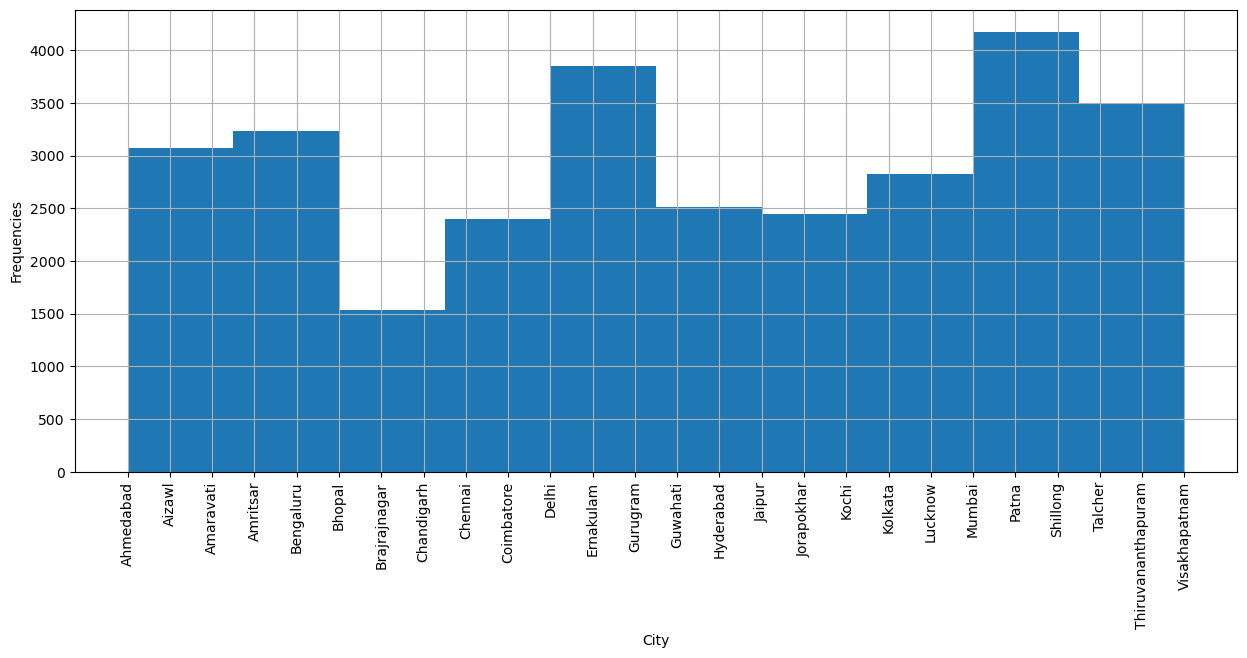

In [26]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df1.City.hist()
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset

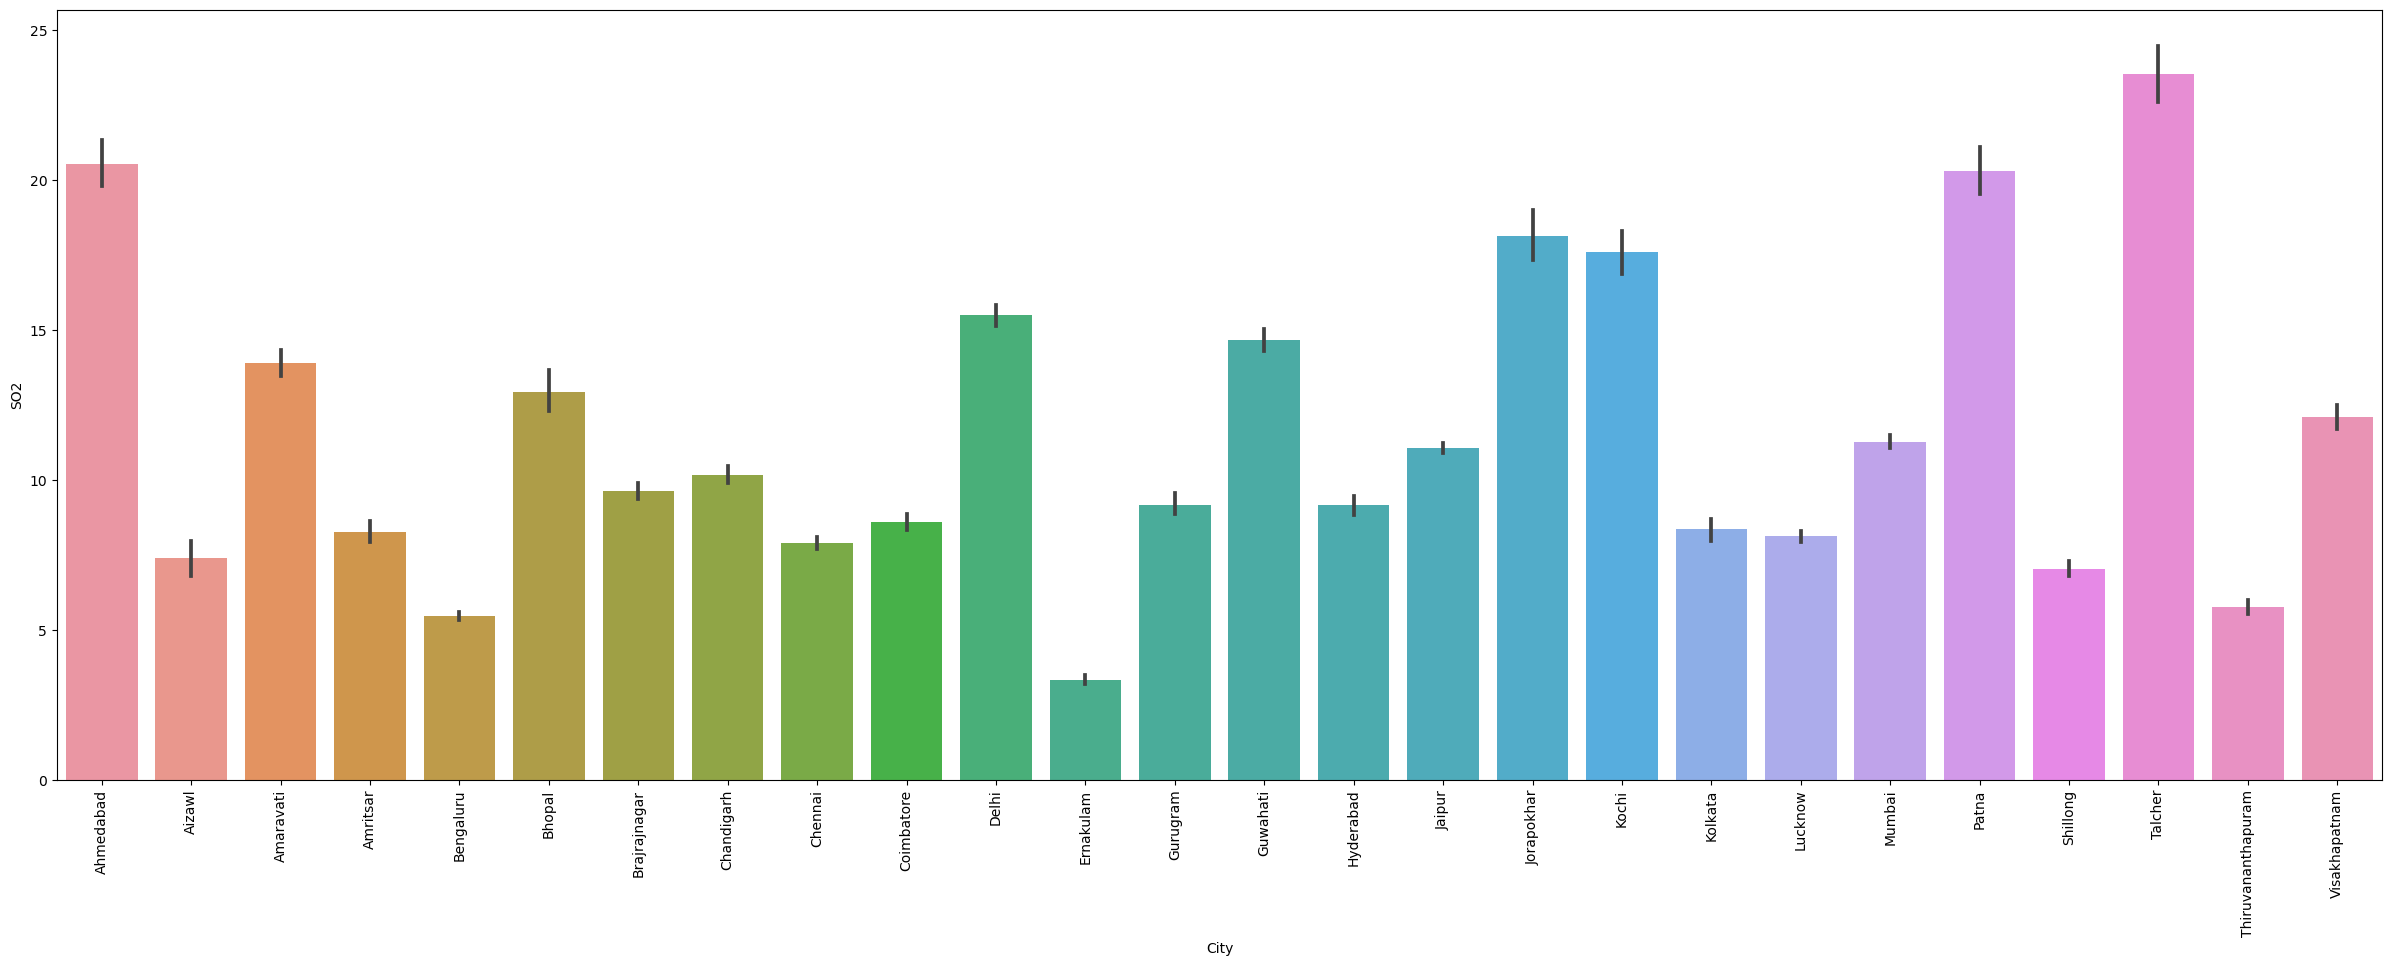

In [27]:
# This visualization shows the name of the state having higher so2 levels
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='SO2',data=df1);


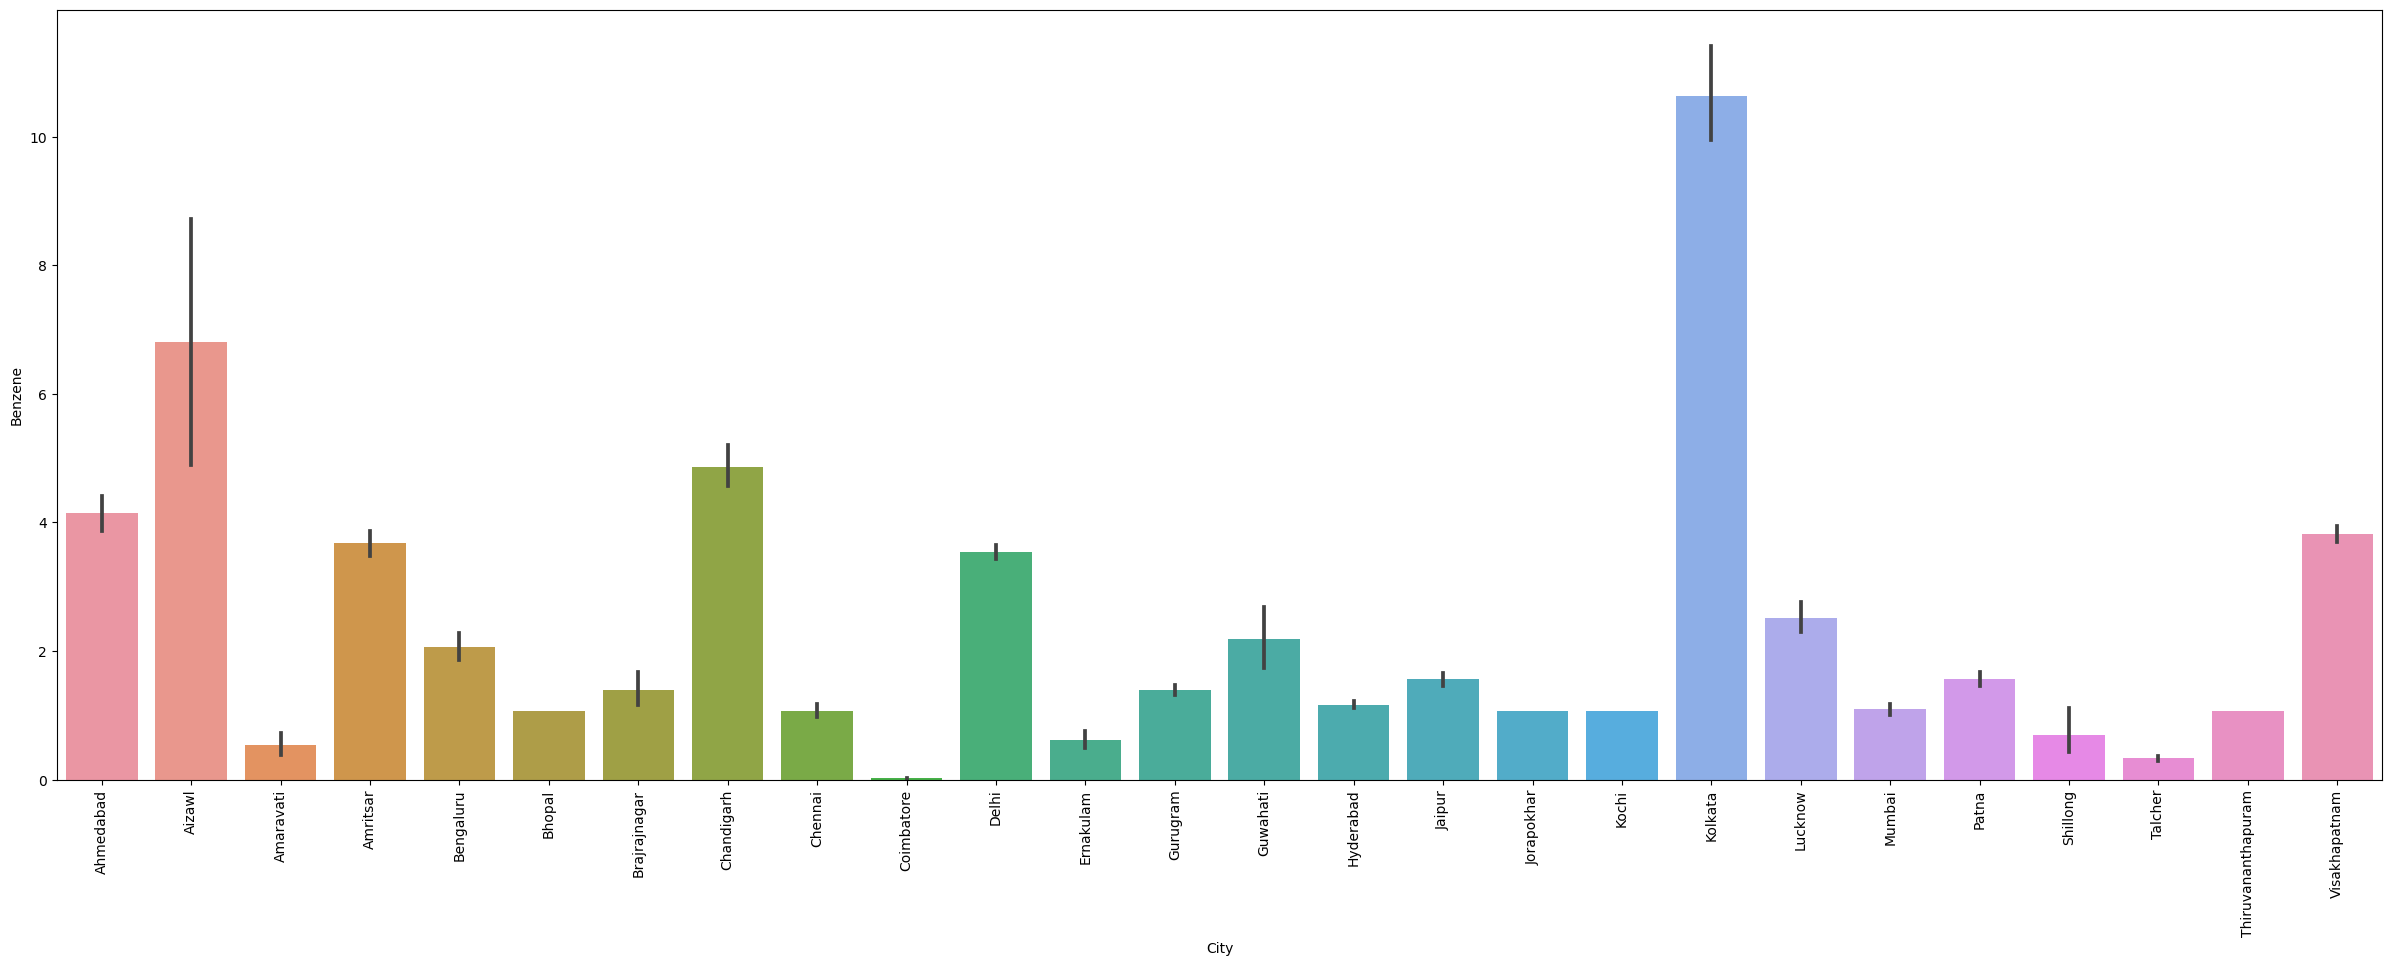

In [32]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='Benzene',data=df1);

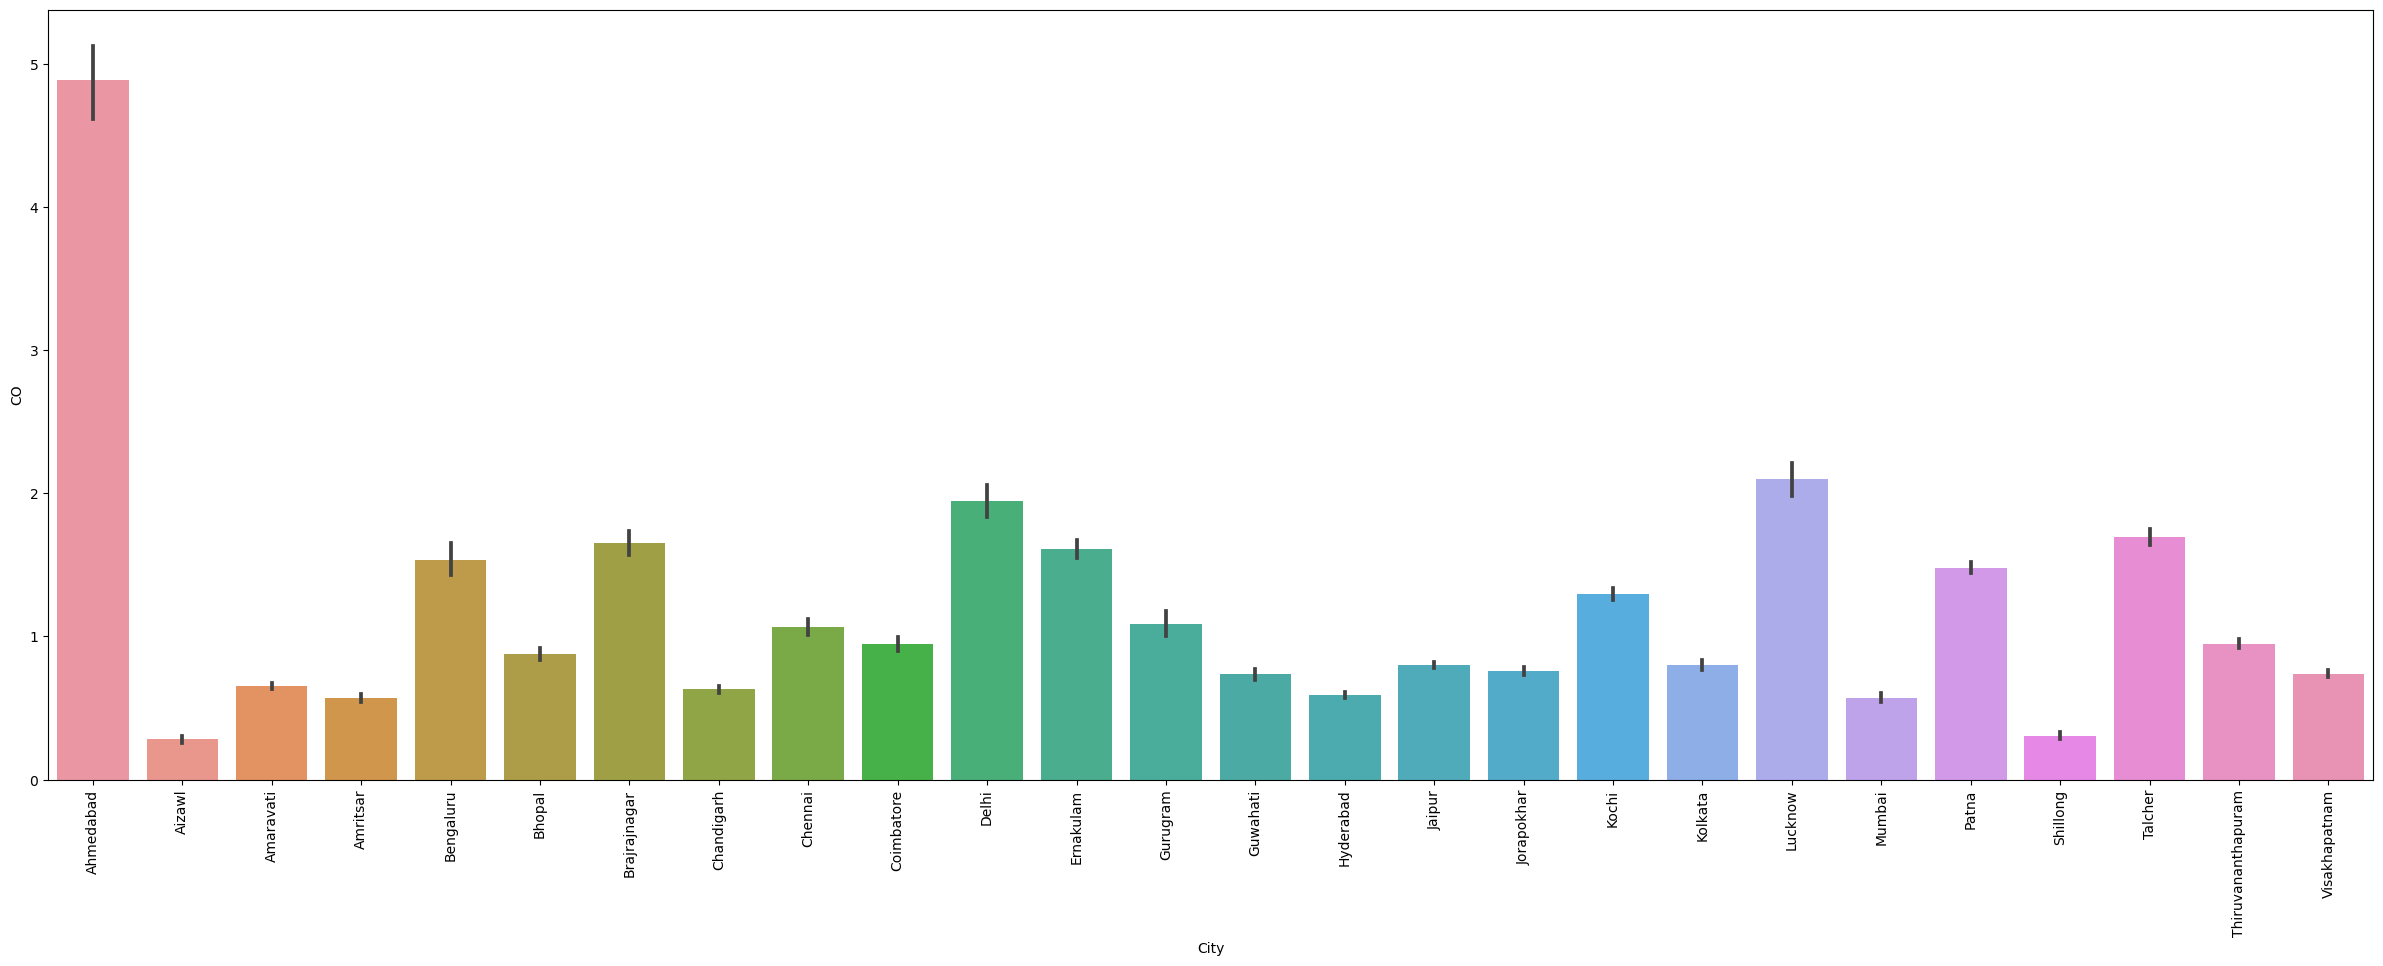

In [33]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='CO',data=df1);

<AxesSubplot:xlabel='count', ylabel='City'>

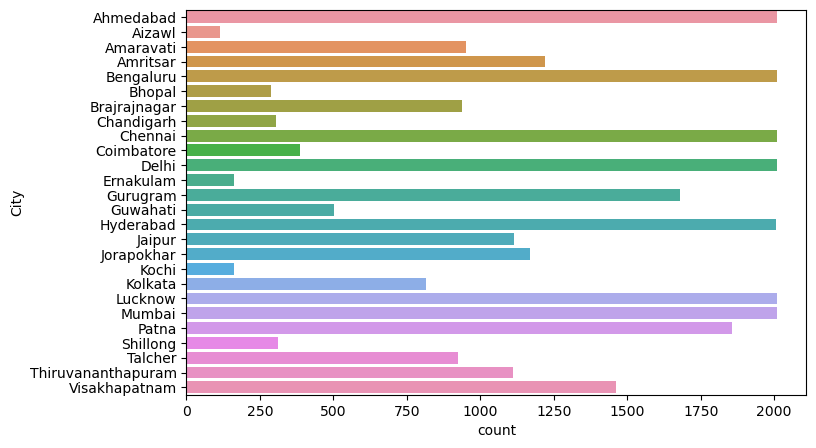

In [39]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=df1['City'])

<AxesSubplot:>

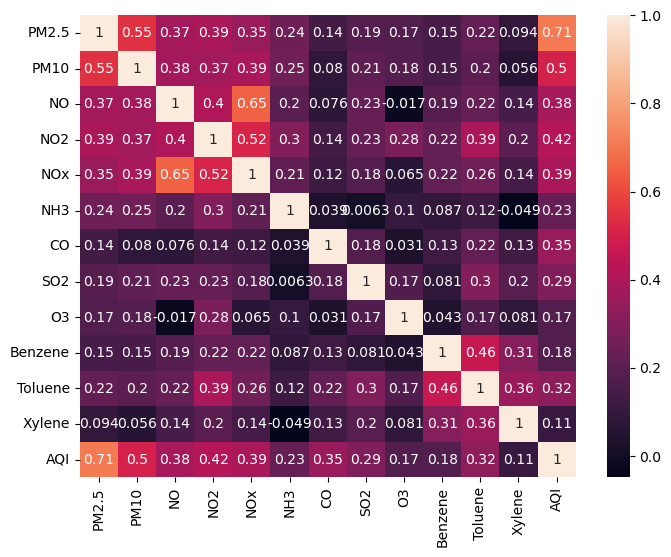

In [40]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(df1.corr(),annot=True)

# Model Evaluation

# Decision Tree Regression using OOPS

In [41]:
class DecisionTree:
    
    def __init__(self):
        self.tree = {}
    
    def find_best_split(self, X, y):
        n_features = X.shape[1]
        best_feature = None
        best_split = None
        best_mse = np.inf
        
        for feature in range(n_features):
            values = np.sort(np.unique(X[:, feature]))
            splits = (values[:-1] + values[1:]) / 2
            
            for split in splits:
                left_idx = X[:, feature] <= split
                right_idx = X[:, feature] > split
                
                left_y = y[left_idx]
                right_y = y[right_idx]
                
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                
                mse = ((left_y - np.mean(left_y))**2).sum() + ((right_y - np.mean(right_y))**2).sum()
                
                if mse < best_mse:
                    best_feature = feature
                    best_split = split
                    best_mse = mse
        
        return best_feature, best_split
    
    def fit(self, X, y):
        def build_tree(X, y, depth=0):
            if depth == 5:
                return np.mean(y)
            
            best_feature, best_split = self.find_best_split(X, y)
            
            if best_feature is None:
                return np.mean(y)
            
            left_idx = X[:, best_feature] <= best_split
            right_idx = X[:, best_feature] > best_split
            
            left = build_tree(X[left_idx], y[left_idx], depth+1)
            right = build_tree(X[right_idx], y[right_idx], depth+1)
            
            return {'feature': best_feature, 'split': best_split, 'left': left, 'right': right}
        
        self.tree = build_tree(X, y)
    
    def predict(self, X):
        def predict_sample(x, tree):
            if isinstance(tree, float):
                return tree
            
            if x[tree['feature']] <= tree['split']:
                return predict_sample(x, tree['left'])
            else:
                return predict_sample(x, tree['right'])
        
        return np.array([predict_sample(x, self.tree) for x in X])


In [42]:
# Split data into training and testing sets
train_data = new_df1.sample(frac=0.8, random_state=42)
test_data = new_df1.drop(train_data.index)

# Split training and testing data into X and y
train_X = train_data.drop('CO', axis=1).to_numpy()
train_y = train_data['CO'].to_numpy()

test_X = test_data.drop('CO', axis=1).to_numpy()
test_y = test_data['CO'].to_numpy()


In [43]:
import time
regressor = DecisionTree()

start_time = time.time()
regressor.fit(train_X, train_y)
end_time = time.time()

pred_y=regressor.predict(test_X)

In [44]:
# Assuming pred_y and test_y are the predicted and true values, respectively

# Calculate the mean absolute error
mae = np.mean(np.abs(pred_y - test_y))
print('Mean Absolute Error:', mae)

# Calculate the mean squared error 
mse = np.mean(np.abs(pred_y - test_y)**2)
print('Mean Squared Error:', mse)

# Calculate the mean absolute percentage error
mape = np.mean(np.abs((test_y - pred_y) / test_y)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

# Calculate the residual sum of squares (RSS)
rss = np.sum((pred_y - test_y)**2)

# Calculate the total sum of squares (TSS)
tss = np.sum((test_y - np.mean(test_y))**2)

# Calculate the R-squared (R2) value
r2 = 1 - (rss / tss)
print('R-squared (R2):', r2)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((pred_y - test_y)**2))
print('Root Mean Squared Error (RMSE):', rmse)

print("Time taken:", end_time - start_time, "seconds")

Mean Absolute Error: 0.5809261472097229
Mean Squared Error: 1.5234769126881993
Mean Absolute Percentage Error (MAPE): inf
R-squared (R2): 0.7236973831855271
Root Mean Squared Error (RMSE): 1.2342920694423176
Time taken: 141.28837633132935 seconds


# Decision tree regression Using sklearn

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

# Define features and target
X = new_df1.drop('AQI', axis=1)
y = new_df1['AQI']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import time
start_time = time.time()
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
end_time = time.time()

# Predict on the test data
y_pred = dt_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print('Mean Squared Error:', mse)
print("Mean Absolute Percentage Error (MAPE): ", mape)
print("R-squared (R2): ", r2)
print("Root Mean Squared Error (RMSE): ", rmse)

print("Time taken:", end_time - start_time, "seconds")

Mean Absolute Error: 16.246317927882174
Mean Squared Error: 1328.7040799051972
Mean Absolute Percentage Error (MAPE):  0.1108420594155195
R-squared (R2):  0.8669758130919346
Root Mean Squared Error (RMSE):  36.451393387704634
Time taken: 0.6914656162261963 seconds


# Comparing the Model

In [56]:
print("Decision Tree Regression Result")
# code 1
result1 = [0.580926,1.5234769,0.723697,1.2342920,141.28837]
df1 = pd.DataFrame({'using OOPS ': result1})

# code 2
result2 = [16.2463179, 1328.704079,0.866975,36.451393,0.6914656,0.110842]
df2 = pd.DataFrame({'using sklearn': result2})

# code 3
result3 = ['Mean Absolute Error','Mean Squared Error','R-squared','Root Mean Squared Error','Time Stamp','Mean Absolute Percentage Error']
df3 = pd.DataFrame({'Column': result3})


# display the results in a table
df = pd.concat([df3, df1, df2,], axis=1)

print("\n")
print(df)

Decision Tree Regression Result


                           Column  using OOPS   using sklearn
0             Mean Absolute Error     0.580926      16.246318
1              Mean Squared Error     1.523477    1328.704079
2                       R-squared     0.723697       0.866975
3         Root Mean Squared Error     1.234292      36.451393
4                      Time Stamp   141.288370       0.691466
5  Mean Absolute Percentage Error          NaN       0.110842


# 1.Bar Plot

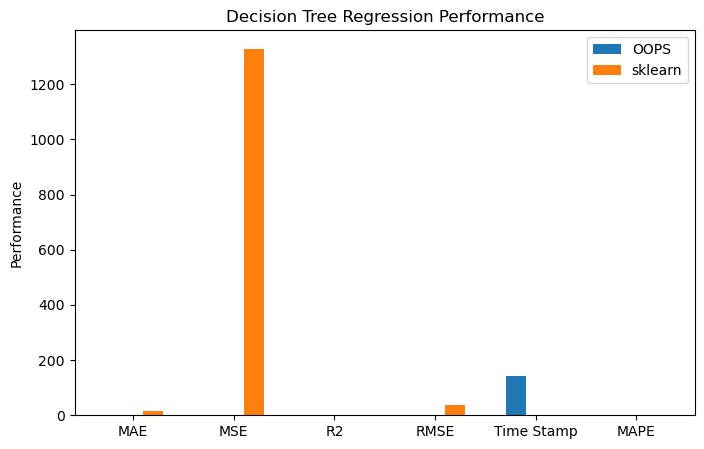

In [59]:
# Define the data for each scenario
OOPS = [0.580926,1.5234769,0.723697,1.2342920,141.28837,0]
sklearn = [16.2463179, 1328.704079,0.866975,36.451393,0.6914656,0.110842]

# Define the labels for each performance measure
labels = ['MAE','MSE','R2','RMSE','Time Stamp','MAPE']

# Define the x-axis ticks and group labels
x = np.arange(len(labels))
group_labels = ['OOPS','sklearn ']

# Define the bar width
width = 0.2

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars for each scenario
ax.bar(x - width, OOPS, width, label='OOPS')
ax.bar(x + width, sklearn, width, label='sklearn')

# Add labels, title, and legend
ax.set_ylabel('Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Decision Tree Regression Performance')
ax.legend()

# Show the plot
plt.show()

# 2.Line Graph

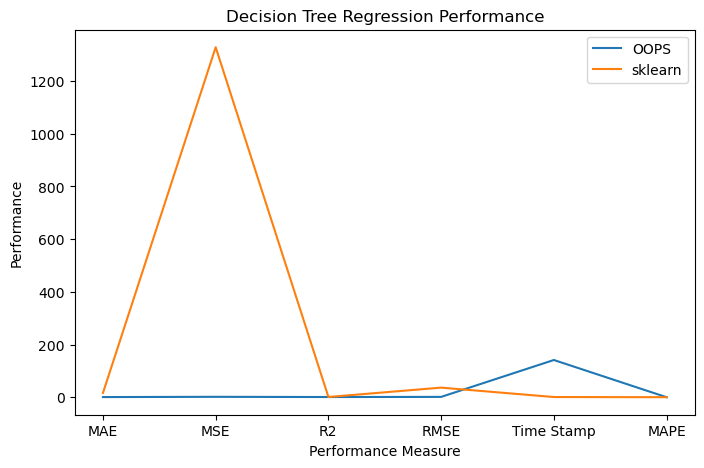

In [60]:
# Define the data for each scenario
OOPS = [0.580926,1.5234769,0.723697,1.2342920,141.28837,0]
sklearn = [16.2463179, 1328.704079,0.866975,36.451393,0.6914656,0.110842]

# Define the labels for each performance measure
labels = ['MAE','MSE','R2','RMSE','Time Stamp','MAPE']

# Define the x-axis ticks
x = np.arange(len(labels))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the lines for each scenario
ax.plot(x, OOPS, label='OOPS')
ax.plot(x, sklearn, label='sklearn')

# Add labels, title, and legend
ax.set_xlabel('Performance Measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Performance')
ax.set_title('Decision Tree Regression Performance')
ax.legend()

# Show the plot
plt.show()